In [193]:
import os
import warnings
import tensorflow as tf
from builder.set_builder import SetBuilder
import matplotlib.pyplot as plt
import utils.df_util as df_util
import numpy as np

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [197]:
builder = SetBuilder('../res/slice/', sliding=200)
builder.build()

正在将所有初始化数据写入内存...
随机器构造完成，耗时113 s


In [182]:
arr = builder.random_data_arr(size=100000, normalized=True)

正在生成数据集...
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
数据集生成完毕，耗时35 s


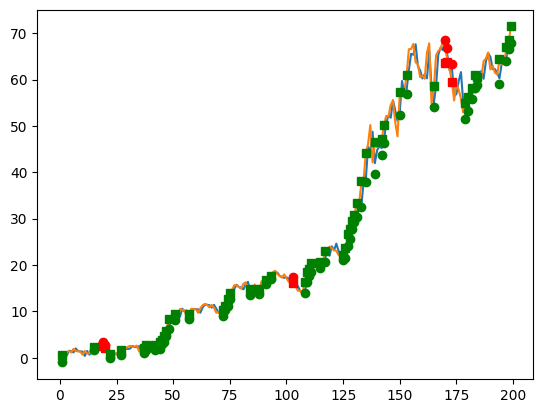

         close       high        low       open  volume  mark
0    -0.185249   0.313645  -0.451670   0.000000   61300     0
1     0.651397   0.663471  -1.033424  -0.523893   61800     1
2     0.469175   1.496835   0.349480   0.561773   74700     0
3     1.129461   1.129461   0.292918   0.411018   63500     0
4     1.472777   1.666879   1.155558   1.500215   70300     0
..         ...        ...        ...        ...     ...   ...
195  63.335971  64.521297  62.889956  63.485925  285800     0
196  63.576138  65.273785  62.958349  63.511227  283000     0
197  66.480093  67.013481  64.052722  64.764752  357300     1
198  67.652543  68.564342  66.620606  66.985352  328400     1
199  71.449754  71.449754  67.860115  68.559524  399100     1

[200 rows x 6 columns]


In [204]:
s = arr[236]
plt.plot(s['open'])
plt.plot(s['close'])
# plt.plot(s['rate_volume'])

for index, row in s.iterrows():
    if row['mark'] == 1:
        plt.plot(index, row['high'], 'gs')
        plt.plot(index, row['low'], 'go')
    if row['mark'] == 2:
        plt.plot(index, row['low'], 'rs')
        plt.plot(index, row['high'], 'ro')
plt.show()
print(s)

In [199]:
y = [df.tail(1)['mark'].values[0] for df in arr[0:18000]]
x = [[i for ar in df[['close', 'high', 'low', 'open']].values for i in ar] for df in arr[0:18000]]
x_2 = [df[['close', 'high', 'low', 'open']].values for df in arr[0:18000]]
v_y = [df.tail(1)['mark'].values[0] for df in arr[18000:20000]]
v_x = [[i for ar in df[['close', 'high', 'low', 'open']].values for i in ar] for df in arr[18000:20000]]
v_x_2 = [df[['close', 'high', 'low', 'open']].values for df in arr[18000:20000]]
y = list(map(lambda item: 0 if item == 2 else item, y))
v_y = list(map(lambda item: 0 if item == 2 else item, v_y))

In [200]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 4, input_shape=(200, 4)),
    tf.keras.layers.MaxPool1D(2),

    tf.keras.layers.Conv1D(64, 4),
    tf.keras.layers.MaxPool1D(2),

    tf.keras.layers.Conv1D(128, 4),
    tf.keras.layers.MaxPool1D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.build()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_41 (Conv1D)          (None, 197, 32)           544       
                                                                 
 max_pooling1d_40 (MaxPoolin  (None, 98, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_42 (Conv1D)          (None, 95, 64)            8256      
                                                                 
 max_pooling1d_41 (MaxPoolin  (None, 47, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_43 (Conv1D)          (None, 44, 128)           32896     
                                                                 
 max_pooling1d_42 (MaxPoolin  (None, 22, 128)        

In [201]:
his = model.fit(np.asarray(x_2), np.asarray(y), epochs=10)

Epoch 1/10
563/563 [==============================] - 14s 23ms/step - loss: 0.9572 - acc: 0.5239
Epoch 2/10
563/563 [==============================] - 13s 22ms/step - loss: 0.7055 - acc: 0.5488
Epoch 3/10
563/563 [==============================] - 13s 22ms/step - loss: 0.6820 - acc: 0.5747
Epoch 4/10
563/563 [==============================] - 13s 23ms/step - loss: 0.6679 - acc: 0.5921
Epoch 5/10
563/563 [==============================] - 13s 22ms/step - loss: 0.6475 - acc: 0.6143
Epoch 6/10
563/563 [==============================] - 13s 23ms/step - loss: 0.6313 - acc: 0.6438
Epoch 7/10
563/563 [==============================] - 13s 23ms/step - loss: 0.5908 - acc: 0.6793
Epoch 8/10
563/563 [==============================] - 13s 24ms/step - loss: 0.5597 - acc: 0.7141
Epoch 9/10
563/563 [==============================] - 13s 23ms/step - loss: 0.5215 - acc: 0.7422
Epoch 10/10
563/563 [==============================] - 13s 24ms/step - loss: 0.4744 - acc: 0.7735


In [203]:
model.evaluate(np.asarray(v_x_2), np.asarray(v_y))

63/63 [==============================] - 0s 5ms/step - loss: 0.7356 - acc: 0.6195


[0.7356048822402954, 0.6194999814033508]

In [72]:
arr[0][['close', 'high', 'low', 'open']].values[0:2]

array([[ -1.89542456,   0.        ,  -3.39869576,   0.        ],
       [ -8.10457357,  -6.209149  , -11.83006795,  -9.73856047]])

In [195]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [196]:
tf.__version__

'2.12.0'

In [198]:
len(arr)

20000